## Importing "Registered vehichles" dataset & Data Preprocessing

In [76]:
import pandas as pd

# 'Initial registration of vehicles by year' dataset
veh_reg_url = (
    "https://admin.opendata.az/dataset/1864a6d3-9210-4b23-a325-1e025980c297/"
    "resource/8e56372b-6d10-4dbb-b25c-c15b36c7e273/download/"
    "nqliyyat-vasitlrinin-ilkin-qeydiyyat-dt_bj_036.csv"
)

veh_reg_df = pd.read_csv(veh_reg_url)
veh_reg_df.head()

,Year,Unnamed: 1,Cəmi (ədəd),minik avtomobilləri (ədəd),yük avtomobilləri (ədəd),avtobuslar (ədəd),motosikletlər (ədəd),qoşqu və yarımqoşqular (ədəd),digərləri (ədəd)
0,2024,NaN,101285.0,85262.0,10243.0,573.0,2094.0,2338.0,775.0
1,2023,NaN,102249.0,84495.0,10432.0,220.0,2687.0,3507.0,908.0
2,2022,NaN,83004.0,69996.0,8056.0,466.0,603.0,3240.0,643.0
3,2021,NaN,95871.0,85680.0,7318.0,347.0,682.0,1640.0,204.0
4,2020,NaN,57940.0,50799.0,4756.0,273.0,486.0,1270.0,356.0


In [44]:
print(f'Number of rows: {len(veh_reg_df)}')

print()
print('Number of missing values per columns:')
nulls_column = veh_reg_df.isnull().sum()
print(nulls_column)

print()
print('Data types of columns:')
print(veh_reg_df.dtypes)

Number of rows: 20

Number of missing values per columns:
Year                              0
Unnamed: 1                       20
Cəmi (ədəd)                       0
minik avtomobilləri (ədəd)        0
yük avtomobilləri (ədəd)          0
avtobuslar (ədəd)                 0
motosikletlər (ədəd)              0
qoşqu və yarımqoşqular (ədəd)     0
digərləri (ədəd)                  0
dtype: int64

Data types of columns:
Year                               int64
Unnamed: 1                       float64
Cəmi (ədəd)                      float64
minik avtomobilləri (ədəd)       float64
yük avtomobilləri (ədəd)         float64
avtobuslar (ədəd)                float64
motosikletlər (ədəd)             float64
qoşqu və yarımqoşqular (ədəd)    float64
digərləri (ədəd)                 float64
dtype: object


In [45]:
# Data Preprocessing
veh_reg_df.drop(columns=[veh_reg_df.columns[1]], inplace=True)  # dropping empty column 

# getting rid of '(ədəd)' parts and being consistent with capitalizing
new_names = {col: col.split('(')[0].strip().capitalize() for col in veh_reg_df.columns}

new_names[veh_reg_df.columns[0]] = 'İl'  # ensuring consistency with Azerbaijani language

veh_reg_df.rename(columns=new_names, inplace=True)

veh_reg_df = veh_reg_df.astype(int)  # converting floating poing numbers to integers

# setting 'İl' column as index
veh_reg_df.set_index('İl', inplace=True)

veh_reg_df.head()  


,Cəmi,Minik avtomobilləri,Yük avtomobilləri,Avtobuslar,Motosikletlər,Qoşqu və yarımqoşqular,Digərləri
İl,,,,,,,
2024,101285,85262,10243,573,2094,2338,775
2023,102249,84495,10432,220,2687,3507,908
2022,83004,69996,8056,466,603,3240,643
2021,95871,85680,7318,347,682,1640,204
2020,57940,50799,4756,273,486,1270,356


## EDA & Insights through visuals ("Registered Vehichles" dataset)

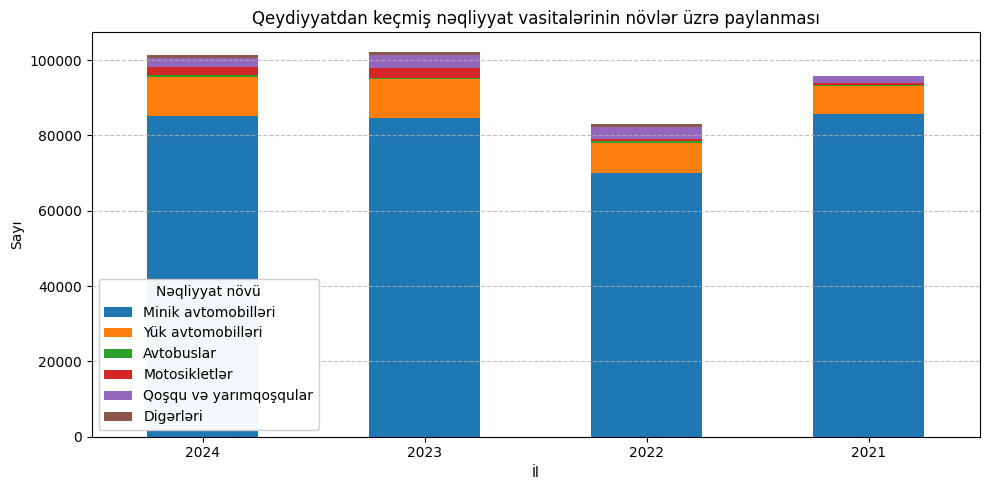

In [46]:
import matplotlib.pyplot as plt

# Distribution of different vehichle types per year for the last 4 years
plot_df = veh_reg_df[:4]  # selecting last 4 years
categories = plot_df.columns[1:]  # excluding 'Cəmi' column

plot_df[categories].plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Qeydiyyatdan keçmiş nəqliyyat vasitalərinin növlər üzrə paylanması')
plt.ylabel('Sayı')
plt.xlabel('İl')
plt.xticks(rotation=0)
plt.legend(title='Nəqliyyat növü', framealpha=0.95)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()
    

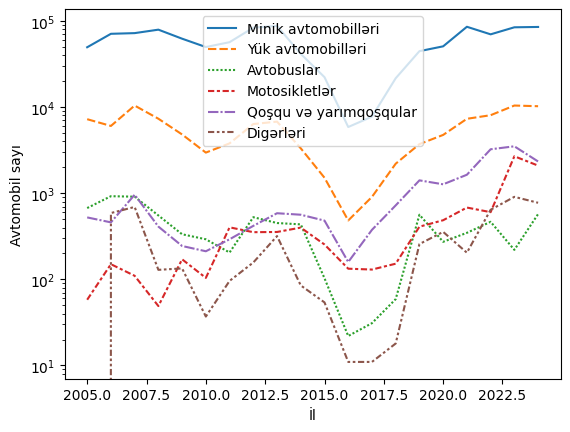

In [71]:
# changes in the number of registrations over the years
sns.lineplot(data=veh_reg_df[categories])

plt.ylabel('Avtomobil sayı')
plt.yscale('log')
plt.show()

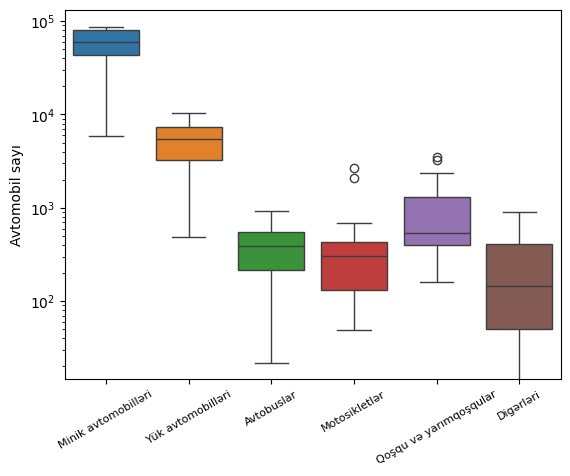

In [58]:
import seaborn as sns

# Box plot for each category
sns.boxplot(data=veh_reg_df[categories])

plt.ylabel("Avtomobil sayı")
plt.yscale('log')
plt.xticks(rotation=30, fontsize=8)
plt.show()

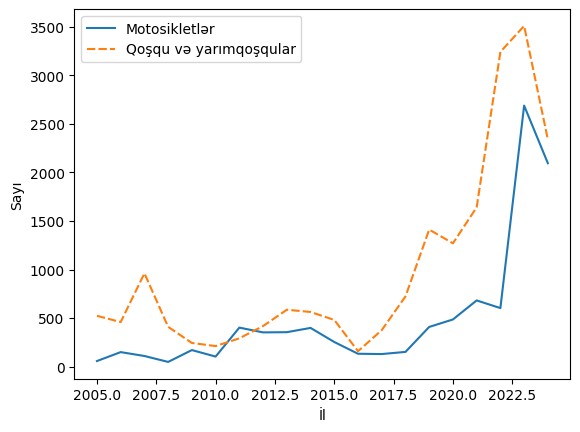

In [74]:
veh_reg_df[['Motosikletlər', 'Qoşqu və yarımqoşqular']].describe()

sns.lineplot(data=veh_reg_df[['Motosikletlər', 'Qoşqu və yarımqoşqular']])
plt.ylabel("Sayı")
plt.show()

We can see sharp increase in the number of  motorcycles ('Motosikletlər') and mopeds ('Qoşqu və yarımqoşqular') in 2022 and 2023. Based on my findings, this is because of these two reasons:
- **The "A1" License & Mandatory Registration Law:** new regulations mandated that all motor vehicles with a speed capacity exceeding 50 km/h must be officially registered
- **The Post-Pandemic Delivery Explosion:** platforms like Trendyol, Wolt, and Bolt Food expanded aggressively, leading to mass purchases of delivery motorcycles